<a href="https://colab.research.google.com/github/ZeusKwon/CSAI_assignment/blob/main/n223a_%EC%8A%A4%ED%84%B0%EB%94%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 3*

# 📝 Assignment
---


### 1)

In [ ]:
tp = 4442
tn = 6165
fp = 1515
fn = 1930
total = tp + tn + fp + fn

In [ ]:
# 재현율에 정확도의 2배 가중치 -> F2_Score, Beta = 2

# Precision
precision = tp/(tp+fp)

# Recall(재현율)
recall = tp/(tp+fn)

# F2_Score
f2 = (1+2**2)*(precision*recall)/(2**2*precision+recall)

print('F2_Score =',f2)

F2_Score = 0.7063126093178566


### 2)


In [3]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.3MB/s 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import re

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

url_train = "https://raw.githubusercontent.com/ZeusKwon/data-drive/main/prediction-of-h1n1-vaccination/train.csv"
url_train_labels="https://raw.githubusercontent.com/ZeusKwon/data-drive/main/prediction-of-h1n1-vaccination/train_labels.csv"
url_test = "https://raw.githubusercontent.com/ZeusKwon/data-drive/main/prediction-of-h1n1-vaccination/test.csv"
url_submission = "https://raw.githubusercontent.com/ZeusKwon/data-drive/main/prediction-of-h1n1-vaccination/submission.csv"

target = 'vacc_h1n1_f'

df = pd.merge(pd.read_csv(url_train),
                 pd.read_csv(url_train_labels)[target],
                left_index=True, right_index=True)
test = pd.read_csv(url_test)
submission = pd.read_csv(url_submission)


In [6]:
train, val = train_test_split(df, train_size=0.80, test_size=0.20, stratify=df[target], random_state=2)

train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [7]:
# 특성 엔지니어링
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def engineer(df):
    
    # behaviorals 관련 새로운 특성 생성
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    # 타겟 변수와 관계 없는 seasonal flu관련 특성 제거
    dels = [col for col in df.columns if 'seas' in col]
    df.drop(columns=dels, inplace=True)
        
    return df

train = engineer(train)
val = engineer(val)
test = engineer(test)

In [8]:
# 훈련/검증/테스트 데이터를 특성과 타겟으로 분리
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [9]:
X_val.drop(columns = ['household_children', 'n_adult_r'], inplace = True) 
X_train.drop(columns = ['household_children', 'n_adult_r'], inplace = True) 
X_test.drop(columns = ['household_children', 'n_adult_r'], inplace = True) 

In [10]:
from category_encoders import TargetEncoder
from category_encoders import HashingEncoder
pipe2 = make_pipeline(
    TargetEncoder(), 
    # HashingEncoder(cols = ['state']),
    # OrdinalEncoder(),
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, max_features = 0.25,criterion = 'gini',
                           n_estimators=200, max_depth=11, class_weight='balanced')
)

pipe2.fit(X_train, y_train)

y_val_pred = pipe2.predict(X_val)
y_tr_pred = pipe2.predict(X_train)
print('Validation accuracy(f1_score):', f1_score(y_val, y_val_pred))
print('Train accuracy(f1_score):', f1_score(y_train, y_tr_pred))
# 0.6313242410910691

Validation accuracy(f1_score): 0.630468234776874
Train accuracy(f1_score): 0.7108947048082775


In [11]:
from category_encoders import TargetEncoder
from category_encoders import HashingEncoder
pipe2 = make_pipeline(
    TargetEncoder(), 
    # HashingEncoder(cols = ['state']),
    # OrdinalEncoder(),
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, max_features = 0.25,criterion = 'gini',
                           n_estimators=200, max_depth=11, class_weight='balanced')
)

pipe2.fit(X_train, y_train)

y_val_pred = pipe2.predict(X_val)
y_tr_pred = pipe2.predict(X_train)
print('Validation accuracy(f1_score):', f1_score(y_val, y_val_pred))
print('Train accuracy(f1_score):', f1_score(y_train, y_tr_pred))
# 0.6313242410910691

Validation accuracy(f1_score): 0.630468234776874
Train accuracy(f1_score): 0.7108947048082775


In [13]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe2, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

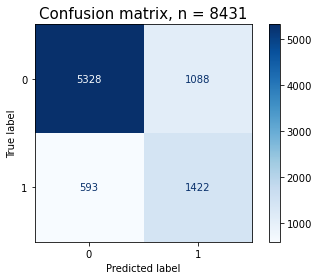

### 3)


In [17]:
from category_encoders import TargetEncoder
from category_encoders import HashingEncoder
val_proba = []
for i in [1, 10, 100,1000]:
    pipe2 = make_pipeline(
        TargetEncoder(), 
        # HashingEncoder(cols = ['state']),
        # OrdinalEncoder(),
        SimpleImputer(strategy='mean'), 
        RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = i))

    pipe2.fit(X_train, y_train)
    pred_proba = pipe2.predict_proba(X_val)[:, 1]
    val_proba.append(pred_proba)

    y_val_pred = pipe2.predict(X_val)
    y_tr_pred = pipe2.predict(X_train)
    print('{0}_Validation accuracy(f1_score):'.format(i), f1_score(y_val, y_val_pred))
    print('{0}_Train accuracy(f1_score):'.format(i), f1_score(y_train, y_tr_pred))
# 0.6313242410910691

1_Validation accuracy(f1_score): 0.4670923379174853
1_Train accuracy(f1_score): 0.7922890968821671
10_Validation accuracy(f1_score): 0.5286585365853659
10_Train accuracy(f1_score): 0.9582133486913675
100_Validation accuracy(f1_score): 0.5680473372781065
100_Train accuracy(f1_score): 0.992044748290864
1000_Validation accuracy(f1_score): 0.5676314235085648
1000_Train accuracy(f1_score): 0.9920398009950249


In [18]:
pd.DataFrame({'n_estimator=1': val_proba[0],
              'n_estimator=10': val_proba[1],
              'n_estimator=100': val_proba[2],
              'n_estimator=1000': val_proba[3]})

,n_estimator=1,n_estimator=10,n_estimator=100,n_estimator=1000
0,0.0,0.0,0.105667,0.077869
1,0.0,0.1,0.080000,0.100000
2,0.0,0.4,0.320000,0.385000
3,0.0,0.4,0.520000,0.534000
4,0.0,0.0,0.110000,0.076000
...,...,...,...,...
8426,0.0,0.6,0.740000,0.791000
8427,1.0,0.4,0.240000,0.220000
8428,0.0,0.4,0.190000,0.162000
8429,0.0,0.0,0.060000,0.050000


In [20]:
import seaborn as sns
k = 0
for i in [1, 10, 100, 1000]:
  g = sns.displot(val_proba[k])
  g.fig.suptitle(f'n_estimator = {[i]}')

### 4)

In [21]:

from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipe1 = make_pipeline(
    OrdinalEncoder(handle_missing="value"),
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=9, random_state=2))
pipe1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['opinion_h1n1_vacc_effective',
                                      'opinion_h1n1_risk',
                                      'opinion_h1n1_sick_from_vacc', 'agegrp',
                                      'employment_status', 'census_msa',
                                      'employment_industry',
                                      'employment_occupation', 'state'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'opinion_h1n1_vacc_effe...
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=9,
                   

In [22]:
pipe2 = make_pipeline(
        TargetEncoder(), 
        
        SimpleImputer(strategy='mean'), 
        RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = 450))

pipe2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('targetencoder',
                 TargetEncoder(cols=['opinion_h1n1_vacc_effective',
                                     'opinion_h1n1_risk',
                                     'opinion_h1n1_sick_from_vacc', 'agegrp',
                                     'employment_status', 'census_msa',
                                     'employment_industry',
                                     'employment_occupation', 'state'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', min_samples_leaf=1,
                               return_df=True, smoothi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                      

In [35]:
from sklearn.metrics import roc_curve
y_pred_proba1 = pipe1.predict_proba(X_val)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_val, y_pred_proba)

In [24]:
from sklearn.metrics import roc_curve
y_pred_proba2 = pipe2.predict_proba(X_val)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_val, y_pred_proba2)

In [27]:
plt.plot(fpr1, tpr1)
plt.plot([0,1],[0,1], ls='--', color='r')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show()

In [28]:
plt.plot(fpr2, tpr2)
plt.plot([0,1],[0,1], ls='--', color='r')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba1)
auc_score

0.8194571341497373

In [37]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba2)
auc_score

0.834507868047004

## 🔥

### 5) 각 평가지표에 대해 결과를 최대한 분석하고 무엇이 부족한지, 어떤 방향으로 성능을 높여야 하는지 논하세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 